Discrete time system analysis (Impulse responce, step responce, Magnitude and phase responce, power spectrum)

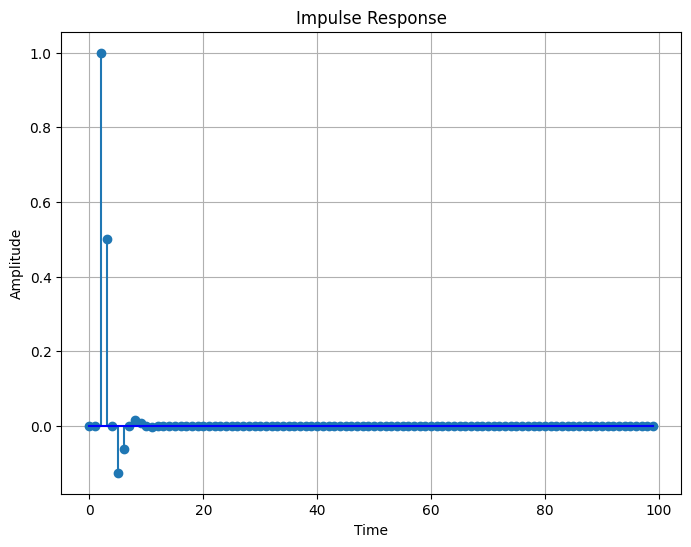

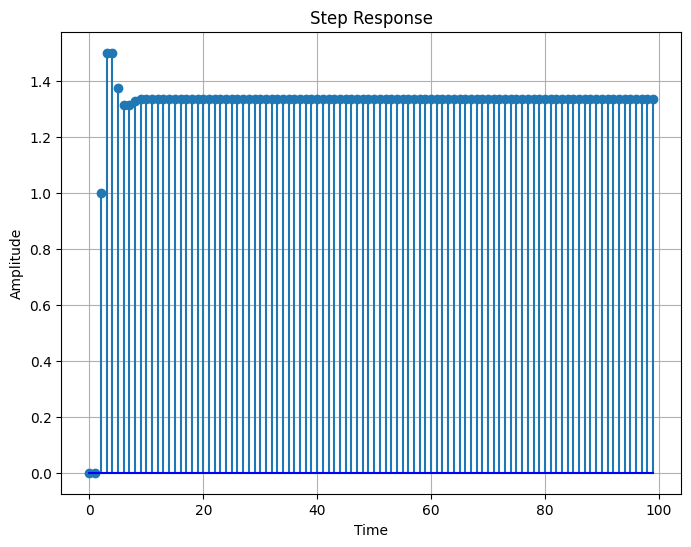

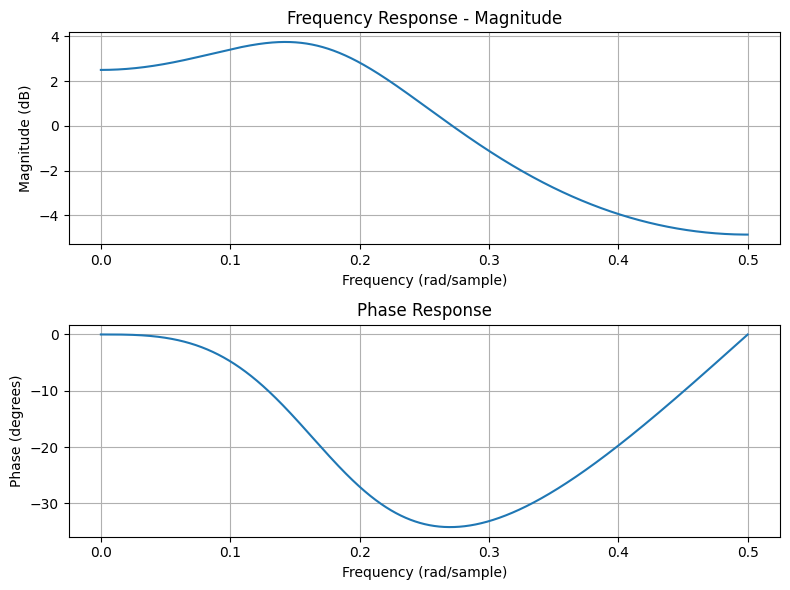

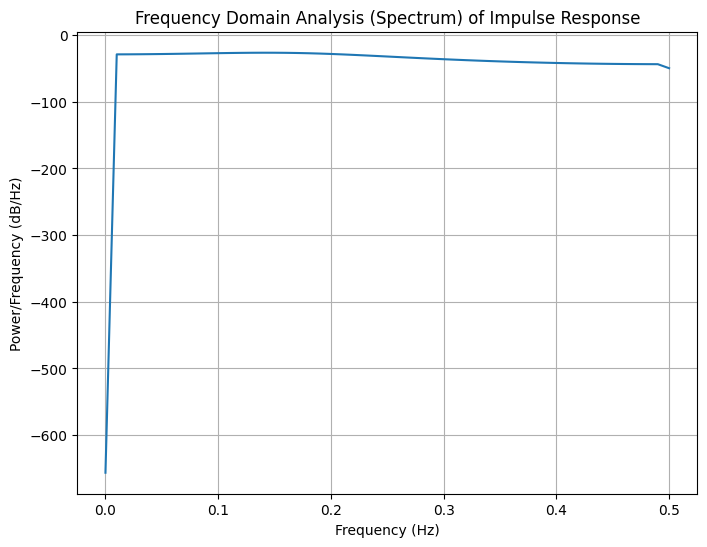

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, dimpulse, dstep, freqz, periodogram

# Define the discrete-time system coefficients
numerator = [1]
denominator = [1, -0.5, 0.25]

# Create a TransferFunction object for a discrete-time system
system = TransferFunction(numerator, denominator, dt=1.0)

# Impulse response analysis
t_impulse, y_impulse = dimpulse(system)
plt.figure(figsize=(8, 6))
plt.stem(t_impulse, np.squeeze(y_impulse), basefmt='b-')
plt.title('Impulse Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Step response analysis
t_step, y_step = dstep(system)
plt.figure(figsize=(8, 6))
plt.stem(t_step, np.squeeze(y_step), basefmt='b-')
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Frequency response analysis
w, h = freqz(numerator, denominator, worN=8000, fs=1.0)
magnitude = np.abs(h)
phase = np.angle(h)

# Magnitude and Phase plots
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(magnitude))
plt.title('Frequency Response - Magnitude')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w, np.degrees(phase))
plt.title('Phase Response')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Frequency domain analysis (Spectrum)
f, Pxx = periodogram(np.squeeze(y_impulse), fs=1.0)
plt.figure(figsize=(8, 6))
plt.plot(f, 20 * np.log10(Pxx))
plt.title('Frequency Domain Analysis (Spectrum) of Impulse Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()
